In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip drive/MyDrive/Yoga-Pose-Classification.zip

Archive:  drive/MyDrive/Yoga-Pose-Classification.zip
replace YogaPoses/Downdog/00000000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: YogaPoses/Downdog/00000000.jpg  
  inflating: YogaPoses/Downdog/00000001.jpg  
  inflating: YogaPoses/Downdog/00000002.jpg  
  inflating: YogaPoses/Downdog/00000003.jpg  
  inflating: YogaPoses/Downdog/00000004.jpg  
  inflating: YogaPoses/Downdog/00000007.jpg  
  inflating: YogaPoses/Downdog/00000008.jpg  
  inflating: YogaPoses/Downdog/00000009.jpg  
  inflating: YogaPoses/Downdog/00000010.jpg  
  inflating: YogaPoses/Downdog/00000011.jpg  
  inflating: YogaPoses/Downdog/00000012.jpg  
  inflating: YogaPoses/Downdog/00000014.jpg  
  inflating: YogaPoses/Downdog/00000016.jpg  
  inflating: YogaPoses/Downdog/00000017.jpg  
  inflating: YogaPoses/Downdog/00000018.jpg  
  inflating: YogaPoses/Downdog/00000019.jpg  
  inflating: YogaPoses/Downdog/00000020.jpg  
  inflating: YogaPoses/Downdog/00000022.jpg  
  inflating: YogaPoses/Downdog/00000023

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import skimage
from skimage.io import imread,imshow
from skimage import transform
import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras import layers as tfl
from sklearn import preprocessing
from pathlib import Path
from PIL import Image
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
pd.set_option('display.max_rows', 99999)
pd.set_option('display.max_colwidth', 400)
tf.config.threading.set_inter_op_parallelism_threads(2)


In [ ]:
labels=list()
path='../content/YogaPoses'
os.listdir(path)
for i in os.listdir(path):
    labels.append(i)

In [ ]:
labels

['Warrior2', 'Downdog', 'Plank', 'Goddess', 'Tree']

In [ ]:
## Counting the Samples
Total_sample=0
for i in os.listdir(path):
    print(f'Length of :{i}= {len(os.listdir(os.path.join(path,i)))}')
    Total_sample+=len(os.listdir(os.path.join(path,i)))
print(f'Total Samples:{Total_sample}')

Length of :Warrior2= 198
Length of :Downdog= 196
Length of :Plank= 197
Length of :Goddess= 199
Length of :Tree= 198
Total Samples:988


In [ ]:
!pip install tqdm
from tqdm import tqdm

In [ ]:
import os
import tqdm
import skimage.io as io
from skimage import transform
import numpy as np

img_size = 170  # 170x170
X = []
Y = []
i = 0
path = '../content/YogaPoses'

for idx, img in enumerate(os.listdir(path)):
    for img_name in tqdm.tqdm(os.listdir(os.path.join(path, img))):
        if i < 300:
            img_file = io.imread(os.path.join(path, img, img_name))
            if img_file is not None:
                img_file = transform.resize(img_file, (img_size, img_size, 3))
                X.append(img_file)
                Y.append(idx)
        else:
            break
        i = i + 1
    i = 0

X = np.asarray(X)
Y = np.asarray(Y)

100%|██████████| 198/198 [00:06<00:00, 30.05it/s]


In [ ]:
X[0]   ## Skimage scale image in range of 0 to 1

array([[[0.39607843, 0.65490196, 0.78039216],
        [0.39607843, 0.65490196, 0.78039216],
        [0.39607843, 0.65490196, 0.78039216],
        ...,
        [0.55718487, 0.74538267, 0.84596783],
        [0.53892503, 0.73500267, 0.83304214],
        [0.52406056, 0.720139  , 0.81817821]],

       [[0.39607843, 0.65490196, 0.78039216],
        [0.39607843, 0.65490196, 0.78039216],
        [0.39607843, 0.65490196, 0.78039216],
        ...,
        [0.55900987, 0.74720767, 0.84779284],
        [0.54752151, 0.74359915, 0.84163863],
        [0.53067638, 0.72675481, 0.82479403]],

       [[0.39607843, 0.65490196, 0.78039216],
        [0.39607843, 0.65490196, 0.78039216],
        [0.39607843, 0.65490196, 0.78039216],
        ...,
        [0.55553296, 0.74373076, 0.84431593],
        [0.54475523, 0.74083287, 0.83887235],
        [0.52798357, 0.724062  , 0.82210122]],

       ...,

       [[0.40784314, 0.66666667, 0.79215686],
        [0.40784314, 0.66666667, 0.79215686],
        [0.40784314, 0

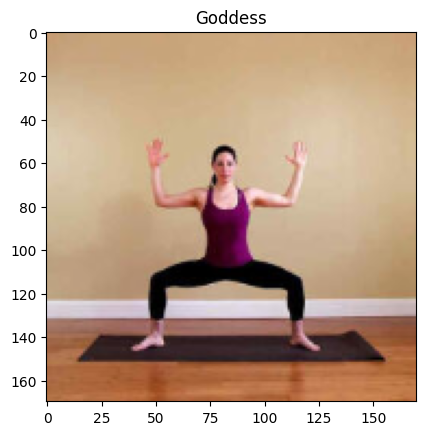

In [ ]:
plt.imshow(X[600])
plt.title(labels[Y[600]])
plt.show()

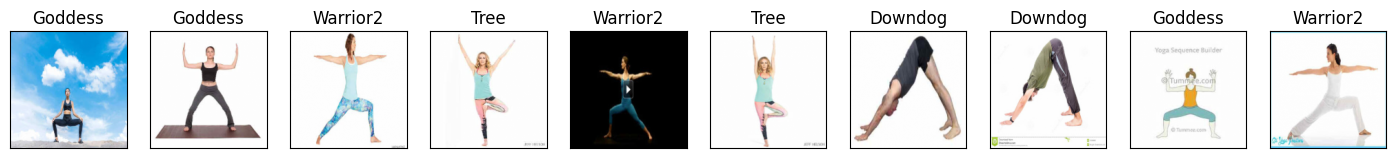

In [ ]:
from random import randint
n = 50  # how many digits we will display
plt.figure(figsize=(90,40))
for i in range(10,20):
    # display original
    rn=randint(0,987)
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(X[rn])
    plt.title(labels[Y[rn]])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y)

In [ ]:
print('Shapes of Data Split into Train & Test Part')
print(f'Training Data->{X_train.shape},{Y_train.shape} Testing Data->{X_test.shape,Y_test.shape}')

Shapes of Data Split into Train & Test Part
Training Data->(790, 170, 170, 3),(790,) Testing Data->((198, 170, 170, 3), (198,))


In [ ]:
# OneHot-Encoding
from keras.utils.np_utils import to_categorical
Y_train=to_categorical(Y_train,num_classes=len(labels))
Y_test=to_categorical(Y_test,num_classes=len(labels))

In [ ]:
Y_train.shape,Y_test.shape

((790, 5), (198, 5))

In [ ]:
# CNN Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

In [ ]:
model=Sequential()
model.add(Conv2D(64,(5,5),padding='same',activation='relu',input_shape=(170,170,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(4,4),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(50,(3,3),padding='same',activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(len(labels),activation='softmax'))  # Multi-class Classification Problem
model.compile(loss='categorical_crossentropy',optimizer='adam'
             ,metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 170, 170, 64)      4864      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 85, 85, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 85, 85, 32)        32800     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 42, 42, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 42, 42, 128)       36992     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 21, 21, 128)     

In [ ]:
from time import time
tic=time()
epoch=50
history=model.fit(X_train,Y_train,validation_split=0.2,epochs=epoch,batch_size=32,verbose=1)
toc=time()
print(f'Training Time {toc-tic}')

Epoch 1/50
20/20 [==============================] - 5s 85ms/step - loss: 1.6547 - accuracy: 0.2025 - val_loss: 1.6088 - val_accuracy: 0.1772
Epoch 2/50
20/20 [==============================] - 2s 77ms/step - loss: 1.5857 - accuracy: 0.2816 - val_loss: 1.5089 - val_accuracy: 0.3354
Epoch 3/50
20/20 [==============================] - 1s 66ms/step - loss: 1.0946 - accuracy: 0.5775 - val_loss: 1.7489 - val_accuracy: 0.4620
Epoch 4/50
20/20 [==============================] - 1s 66ms/step - loss: 0.8806 - accuracy: 0.6756 - val_loss: 0.9524 - val_accuracy: 0.6646
Epoch 5/50
20/20 [==============================] - 1s 60ms/step - loss: 0.6129 - accuracy: 0.7801 - val_loss: 0.8444 - val_accuracy: 0.7278
Epoch 6/50
20/20 [==============================] - 1s 60ms/step - loss: 0.4362 - accuracy: 0.8528 - val_loss: 0.9135 - val_accuracy: 0.7342
Epoch 7/50
20/20 [==============================] - 1s 60ms/step - loss: 0.2744 - accuracy: 0.9161 - val_loss: 1.2768 - val_accuracy: 0.7342
Epoch 8/50
20

Text(0.5, 1.0, 'Loss evolution')

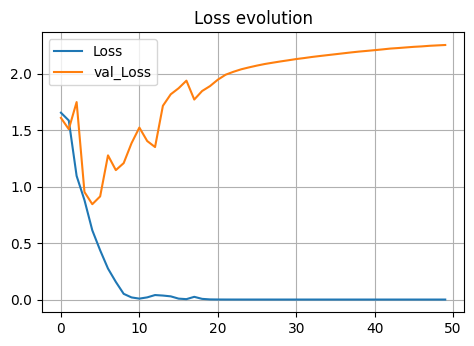

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

Text(0.5, 1.0, 'Accuracy')

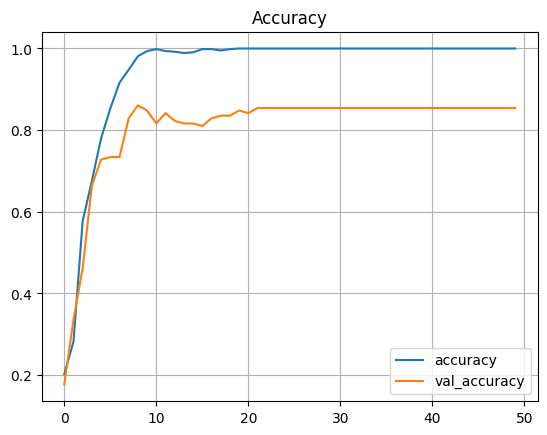

In [ ]:
plt.subplot(1,1,1)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy')

In [ ]:
model.save('./Simple_CNN_model.h5')

In [ ]:
score=model.evaluate(X_test,Y_test,verbose=1)

7/7 [==============================] - 0s 18ms/step - loss: 1.0361 - accuracy: 0.8586


In [ ]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
print(y_pred)

7/7 [==============================] - 0s 16ms/step
[1 2 0 1 3 4 1 3 1 0 3 3 2 0 2 1 4 2 1 0 3 1 0 4 2 2 3 4 2 4 3 1 3 2 2 3 2
 3 1 2 2 2 4 0 3 0 3 2 4 4 3 3 4 4 0 0 3 1 3 3 4 0 4 2 1 0 3 4 2 0 3 2 0 4
 0 1 0 2 1 1 3 1 2 1 4 2 4 2 4 0 1 3 3 0 0 3 0 0 3 0 4 1 3 0 4 2 1 3 3 2 2
 2 4 1 4 0 4 0 4 3 1 4 0 1 2 1 4 3 0 2 1 3 4 3 3 0 1 4 4 4 1 4 3 0 3 3 3 2
 3 2 1 2 1 2 4 1 4 1 2 1 2 3 2 3 3 2 2 1 4 0 3 1 4 4 4 4 4 0 1 3 2 1 3 3 0
 4 4 0 0 4 3 4 1 0 4 0 3 0]


In [ ]:
Y_test=np.argmax(Y_test,axis=1)

In [ ]:
print(Y_test)

[1 2 0 1 3 4 1 3 1 0 1 3 2 0 2 1 4 2 1 0 3 0 0 4 2 2 3 4 2 4 1 1 3 1 2 3 2
 3 1 2 2 2 4 0 3 0 3 2 4 4 3 3 4 2 3 0 4 1 3 0 4 0 4 2 1 0 3 3 2 0 3 2 0 4
 0 1 0 2 1 2 3 1 2 1 4 2 4 0 3 0 1 3 2 0 0 3 0 0 3 0 4 1 3 0 4 2 1 3 3 2 2
 2 4 1 4 0 1 0 4 4 1 4 0 1 2 1 4 3 0 2 1 4 4 0 3 0 1 4 3 4 1 4 3 0 0 3 0 2
 3 2 2 2 1 2 4 1 3 1 2 1 2 1 2 3 3 2 2 1 4 3 4 1 4 4 4 4 4 0 1 3 2 1 3 3 0
 4 3 0 0 4 0 4 1 1 4 0 3 0]


In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(Y_test,y_pred))

[[33  1  1  5  0]
 [ 1 33  1  3  1]
 [ 0  2 35  1  1]
 [ 2  0  0 33  5]
 [ 0  0  0  4 36]]


In [ ]:
print(metrics.classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.92      0.85      0.88        39
           2       0.95      0.90      0.92        39
           3       0.72      0.82      0.77        40
           4       0.84      0.90      0.87        40

    accuracy                           0.86       198
   macro avg       0.87      0.86      0.86       198
weighted avg       0.87      0.86      0.86       198



7/7 [==============================] - 0s 16ms/step


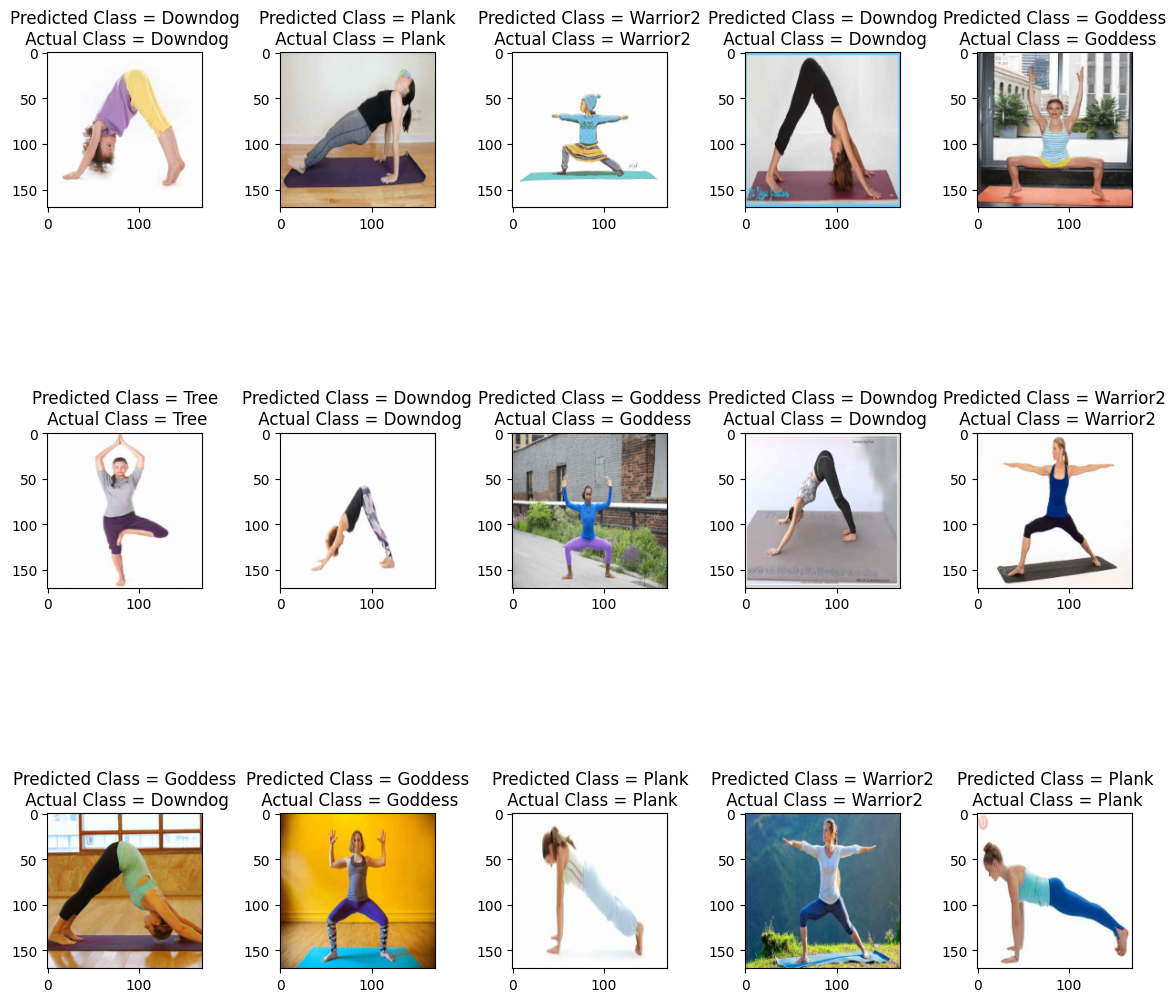

In [ ]:
predicted_classes=model.predict(X_test)
predicted_classes=np.argmax(predicted_classes,1)
Y_classes=Y_test
L = 3
W = 5
fig, axes = plt.subplots(L, W, figsize = (14,14))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Predicted Class = {labels[predicted_classes[i]]}\n Actual Class = {labels[Y_classes[i]]}")
    axes[i].axis('on')
plt.subplots_adjust(wspace=0.5)

In [ ]:
IMG_SIZE = (224, 224)
input_directory = "../content/YogaPoses/"
train_dataset = image_dataset_from_directory(input_directory,
                                             shuffle=True,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='training',
                                             seed=42)
validation_dataset = image_dataset_from_directory(input_directory,
                                             shuffle=True,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='validation',
                                             seed=42)

Found 988 files belonging to 5 classes.
Using 791 files for training.
Found 988 files belonging to 5 classes.
Using 197 files for validation.


In [ ]:
class_names = train_dataset.class_names
print(class_names)

['Downdog', 'Goddess', 'Plank', 'Tree', 'Warrior2']


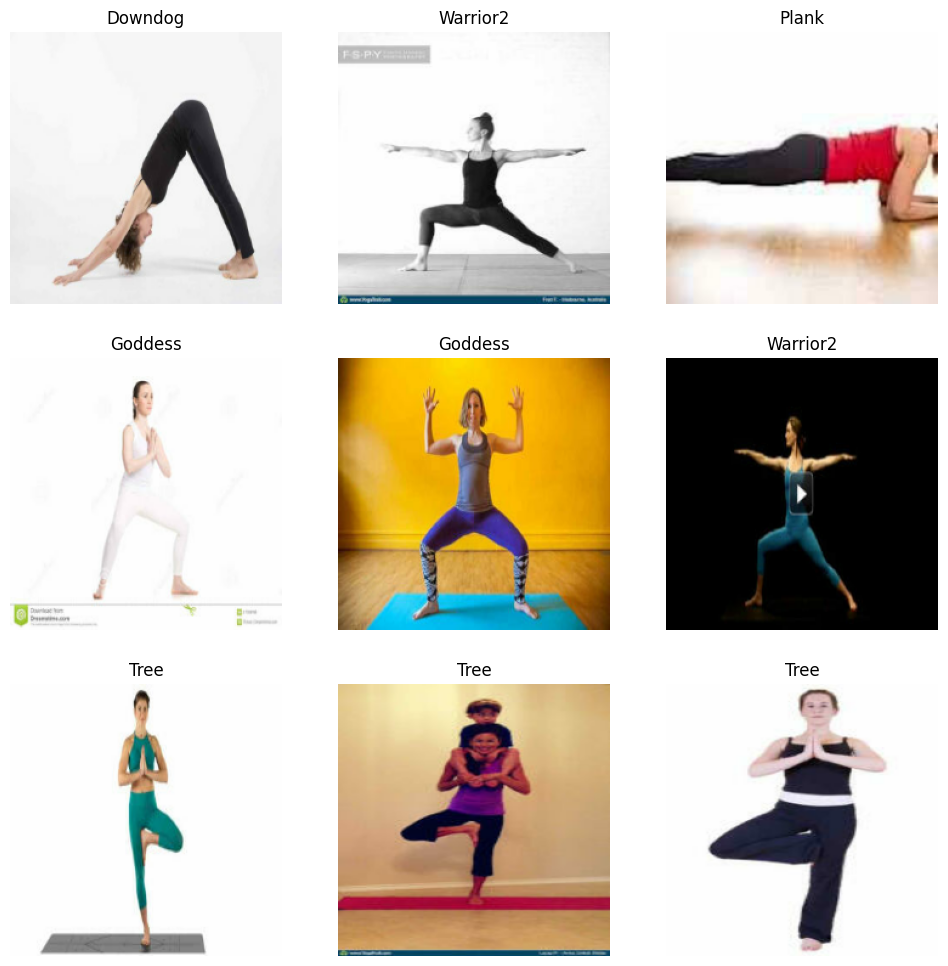

In [ ]:
plt.figure(figsize=(12, 12))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
# function to randomly flip image and rotate
def data_augmenter():
    data_augmentation = tf.keras.Sequential([])
    data_augmentation.add(RandomFlip('horizontal')) # Flip img horizontally
    data_augmentation.add(RandomRotation(0.2))      # Rotate randomly
    return data_augmentation

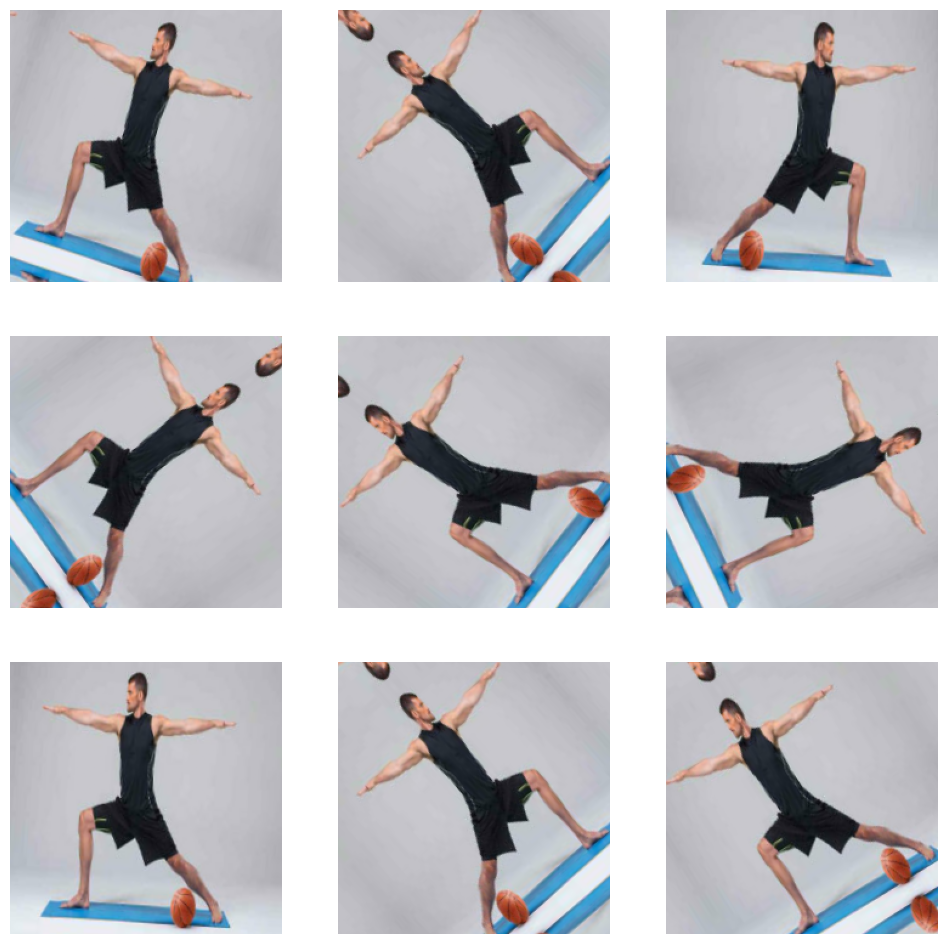

In [ ]:
# for illustration, print augmented images of an input image in training data
data_augmentation = data_augmenter()

for image, _ in train_dataset.take(1):
    plt.figure(figsize=(12, 12))
    first_image = image[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [ ]:
# define base model to be the MobileNet for further processing with it
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SIZE + (3,),
                                                   include_top=False,
                                                   weights='imagenet')

In [ ]:
def model(image_shape=IMG_SIZE, data_augmentation=data_augmenter(), base_model=base_model):

    input_shape = image_shape + (3,)
    #base_model = tf.keras.applications.MobileNetV2(input_shape=input_shape,
    #                                               include_top=False,
    #                                               weights='imagenet')
    base_model.trainable = False    # freeze base model by making it non trainable
    inputs = tf.keras.Input(shape=input_shape) # create input layer (Same as imageNetv2 input size)
    x = data_augmentation(inputs) # apply data augmentation to the inputs
    x = preprocess_input(x) # data preprocessing using the same weights the model was trained
    x = base_model(x, training=False) # set training to False
    x = tfl.GlobalAveragePooling2D()(x) # use global avg pooling to summarize the info in each channel
    x = tfl.Dropout(0.2)(x)  # include dropout with probability of 0.2 to avoid overfitting
    outputs = tfl.Dense(units=5, activation='softmax')(x) #use a prediction layer with 'softmax' classification
    model = tf.keras.Model(inputs, outputs)

    return model

In [ ]:
model = model(IMG_SIZE, data_augmentation, base_model)
base_learning_rate = 0.01
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
initial_epochs = 5
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=initial_epochs)

Epoch 1/5
25/25 [==============================] - 4s 165ms/step - loss: 0.0795 - accuracy: 0.9709 - val_loss: 0.0612 - val_accuracy: 0.9797
Epoch 2/5
25/25 [==============================] - 4s 163ms/step - loss: 0.1104 - accuracy: 0.9697 - val_loss: 0.1252 - val_accuracy: 0.9442
Epoch 3/5
25/25 [==============================] - 5s 181ms/step - loss: 0.0857 - accuracy: 0.9684 - val_loss: 0.0975 - val_accuracy: 0.9746
Epoch 4/5
25/25 [==============================] - 4s 165ms/step - loss: 0.0450 - accuracy: 0.9874 - val_loss: 0.1330 - val_accuracy: 0.9543
Epoch 5/5
25/25 [==============================] - 5s 184ms/step - loss: 0.0611 - accuracy: 0.9785 - val_loss: 0.1738 - val_accuracy: 0.9391


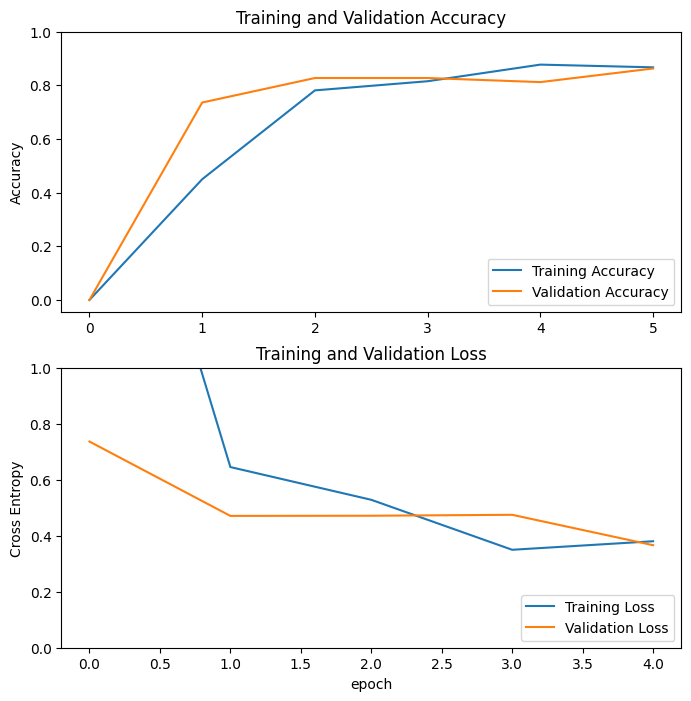

In [ ]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  154


In [ ]:
base_model = model.layers[4]
base_model.trainable = True #unfreeze the base model
fine_tune_at = 120 # Fine-tune from this layer onwards

for layer in base_model.layers[:fine_tune_at]: # Freeze all the layers before the `fine_tune_at` layer
    layer.trainable = True
loss_function=tf.keras.losses.SparseCategoricalCrossentropy() # Define a Sparse Categorical Croos Entropy
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01*base_learning_rate) # Define an Adam optimizer with a learning rate of 0.01 * base_learning_rate
metrics=['accuracy'] # Use accuracy as evaluation metric
model.compile(loss=loss_function,
              optimizer = optimizer,
              metrics=metrics)

In [ ]:
fine_tune_epochs = 5
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 5/10
25/25 [==============================] - 4s 165ms/step - loss: 0.0445 - accuracy: 0.9823 - val_loss: 0.0699 - val_accuracy: 0.9746
Epoch 6/10
25/25 [==============================] - 5s 178ms/step - loss: 0.0356 - accuracy: 0.9810 - val_loss: 0.0900 - val_accuracy: 0.9645
Epoch 7/10
25/25 [==============================] - 4s 166ms/step - loss: 0.0231 - accuracy: 0.9899 - val_loss: 0.0984 - val_accuracy: 0.9695
Epoch 8/10
25/25 [==============================] - 4s 166ms/step - loss: 0.0146 - accuracy: 0.9975 - val_loss: 0.1140 - val_accuracy: 0.9797
Epoch 9/10
25/25 [==============================] - 5s 178ms/step - loss: 0.0185 - accuracy: 0.9975 - val_loss: 0.1019 - val_accuracy: 0.9797
Epoch 10/10
25/25 [==============================] - 4s 168ms/step - loss: 0.0393 - accuracy: 0.9836 - val_loss: 0.1414 - val_accuracy: 0.9645


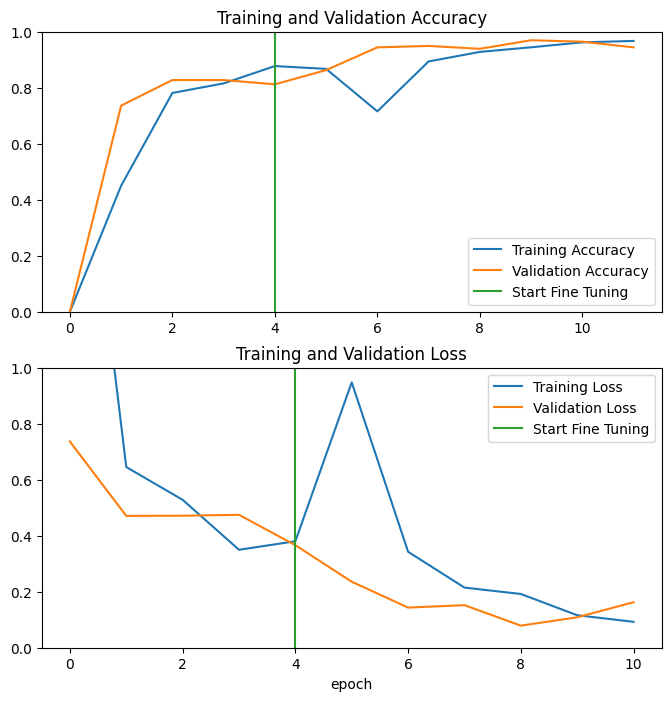

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()